# **다음 분기에 어떤 게임을 설계해야 할까**

---



In [1]:
# 한글폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 전처리 진행

데이터 불러오기 및 전체적인 구성 파악

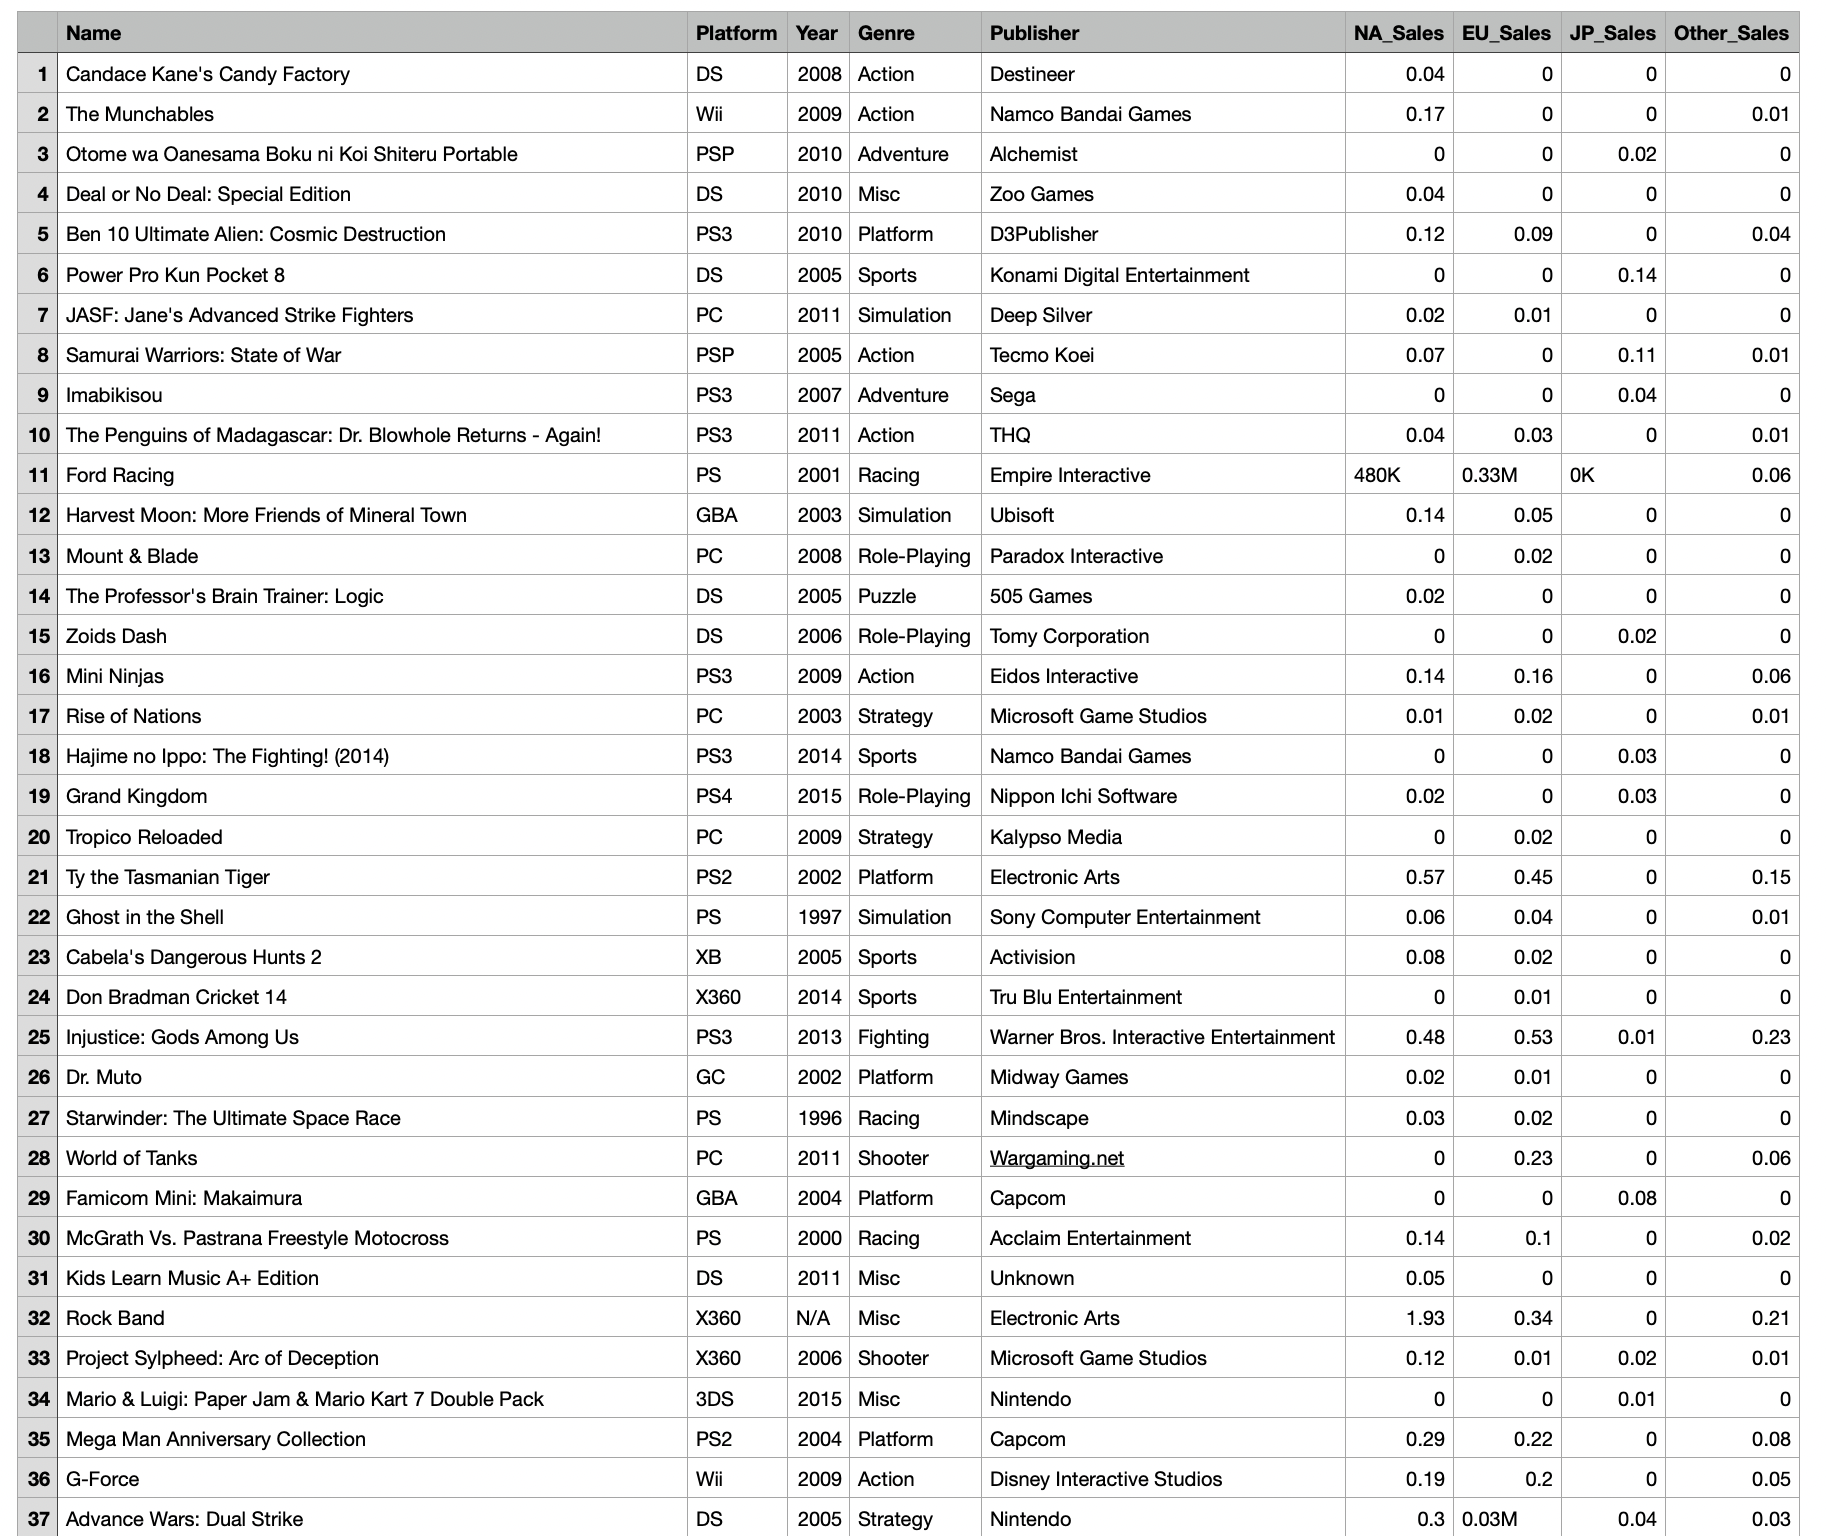

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

# data 불러오기
df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')

In [5]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


결측치 확인 및 처리

In [6]:
# 결측치(Missing Value)가 있는지 확인
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
# 결측치가 하나라도 있는 행 확인
# 버릴것인지 (버릴려면 357개의 데이터가 삭제된다. 전체데이터 16598개 중 357개, 2.15%의 data loss 발생)
# 대체할것인지 (대체하려면 데이터를 직접 찾아서 채우는 과정이 필요)
condition = df.Year.isnull() | df.Genre.isnull() | df.Publisher.isnull()
print(df[condition].shape)
df.loc[condition, ['Year', 'Genre', 'Publisher']].head()

(357, 10)


,Year,Genre,Publisher
31,NaN,Misc,Electronic Arts
50,2005.0,NaN,Sony Computer Entertainment
109,NaN,Racing,Unknown
272,2010.0,Simulation,NaN
273,NaN,Puzzle,Avanquest


In [8]:
# ㅋㅋ당연히 버리지
df = df.dropna()
df.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [9]:
# df.dtypes 대신 info()를 사용하여 데이터 확인
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB
None
(16241, 10)


판매량 통일 필요

In [10]:
# 판매량 단위 통일을 위해 형 변환

def ToInt(value):
  if "M" in value:
    value = str(value).replace("M", "")
    return int(pd.to_numeric(value)*1000000)
  elif "K" in value:
    value = str(value).replace("K", "")
    return int(pd.to_numeric(value)*1000)
  else:
    return int(pd.to_numeric(value)*1000000)

# int로 형 변환

df.NA_Sales = df.NA_Sales.apply(ToInt)
df.EU_Sales = df.EU_Sales.apply(ToInt)
df.JP_Sales = df.JP_Sales.apply(ToInt)
df.Other_Sales = df.Other_Sales.apply(ToInt)

통일된 판매량으로 총판매량을 나타내는 feature 생성

In [11]:
# 게임 별 총 판매량을 나타내는 새로운 feature 생성
df['Total_Sales'] = df.NA_Sales + df.EU_Sales + df.JP_Sales + df.Other_Sales

In [12]:
df.head() #  Total_Sales feature 생성 확인

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000,0,0,0,40000
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000,0,0,10000,180000
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20000,0,20000
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000,0,0,0,40000
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000,90000,0,40000,250000


출시년도 형태 통일

In [13]:
# 출시년도 형태 바꾸기 00 -> 0000

def ChangeDateType(date):
  if date <= 16:
    date = 2000 + date
    return date
  elif  16 < date <= 98:
    date = 1900 + date
    return date
  else:
    return date

df.Year = df.Year.astype(int)
df.Year = df.Year.apply(ChangeDateType)

In [14]:
# 전처리 후
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000


# 지역에 따라서 선호하는 게임 장르가 다를까?

게임 장르 확인

In [15]:
# 게임 장르 확인
print(df.Genre.unique())
print(df.Genre.nunique())

['Action' 'Adventure' 'Misc' 'Platform' 'Sports' 'Simulation' 'Racing'
 'Role-Playing' 'Puzzle' 'Strategy' 'Fighting' 'Shooter']
12


In [16]:
# 판매량 단위를 만 단위로 바꿈
df.NA_Sales = df.NA_Sales//10000
df.EU_Sales = df.EU_Sales//10000
df.JP_Sales = df.JP_Sales//10000
df.Other_Sales = df.Other_Sales//10000
df.Total_Sales = df.Total_Sales//10000

In [17]:
df.head(3)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,4,0,0,0,4
1,2,The Munchables,Wii,2009,Action,Namco Bandai Games,17,0,0,1,18
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,2,0,2


In [18]:
pd.set_option('display.float_format', '{:.1f}'.format) #소수점 첫째자리까지만 표시

4개 지역 장르별 총 판매량

In [19]:
gs = df.groupby('Genre')[df.columns[-5:]].sum()
gs # 4개 지역 장르별 총판매량 (단위: 만)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,
Action,85872,51361,15660,18397,171290
Adventure,10179,6366,5187,1670,23402
Fighting,22033,9990,8714,3615,44352
Misc,39472,20815,10418,7263,77968
Platform,44537,20062,13052,5145,82796
Puzzle,12157,5047,5624,1244,24072
Racing,35467,23501,5632,7651,72251
Role-Playing,31875,18307,34292,5673,90147
Shooter,57445,31019,3818,10186,102468


장르별 총 판매량 내림차순 조회

In [20]:
gs.Total_Sales.sort_values(ascending=False).head(5) 

Genre
Action          171290
Sports          130527
Shooter         102468
Role-Playing     90147
Platform         82796
Name: Total_Sales, dtype: int64

지역별 게임장르 선호도 시각화

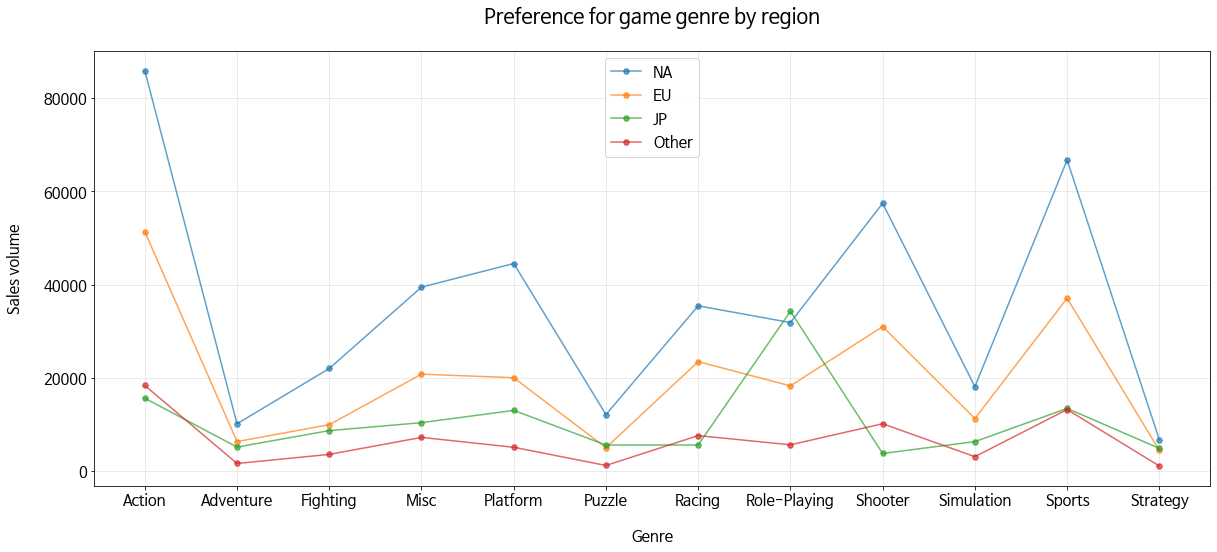

In [21]:
plt.figure(figsize=(20,8))

plt.plot(gs.index, gs.NA_Sales, label='NA', marker='H', alpha=0.7)
plt.plot(gs.index, gs.EU_Sales, label='EU', marker='H', alpha=0.7)
plt.plot(gs.index, gs.JP_Sales, label='JP', marker='H', alpha=0.7)
plt.plot(gs.index, gs.Other_Sales, label='Other', marker='H', alpha=0.7)
plt.title('Preference for game genre by region', fontsize=20, position=(0.5, 1.0+0.05))
plt.xlabel('Genre', fontsize=15, labelpad=20.0)
plt.ylabel('Sales volume', rotation=90, fontsize=15,labelpad=20.0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper center',prop={'size': 15})
plt.grid(alpha=0.3)
plt.show()

지역별 상위 5개 게임 장르 시각화

In [22]:
# 지역별 상위 5개 게임 장르 시각화

NA_labels = list(gs.NA_Sales.sort_values(ascending=False).head(5).index)
NA_values = list(gs.NA_Sales.sort_values(ascending=False).head(5))

EU_labels = list(gs.EU_Sales.sort_values(ascending=False).head(5).index)
EU_values = list(gs.EU_Sales.sort_values(ascending=False).head(5))

JP_labels = list(gs.JP_Sales.sort_values(ascending=False).head(5).index)
JP_values = list(gs.JP_Sales.sort_values(ascending=False).head(5))

Other_labels = list(gs.Other_Sales.sort_values(ascending=False).head(5).index)
Other_values = list(gs.Other_Sales.sort_values(ascending=False).head(5))

colors1 = sns.color_palette('YlGnBu_r',5)

def VisualizeData(labels,values,region):
    plt.figure(figsize=(10,5))
    plt.bar(labels,values, width=0.5, color=colors1, alpha=0.7)
    plt.title('Top 5 game genres in '+region, fontsize=20,position=(0.5, 1.0+0.05))
    plt.xlabel('Genre', fontsize=15, labelpad=20)
    plt.ylabel('Sales volume', rotation=90, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim(top=values[0]*1.17)
    plt.grid(alpha=0.2)
    for idx, txt in enumerate(values):
        plt.text(labels[idx], values[idx] + 1500, int(txt), ha='center', fontsize=12)

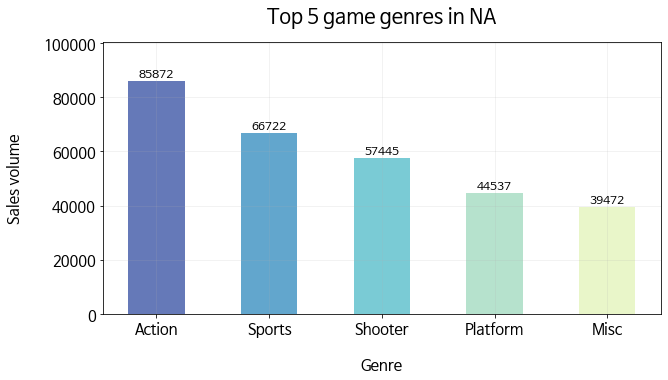

In [23]:
VisualizeData(NA_labels,NA_values,'NA')
plt.show()

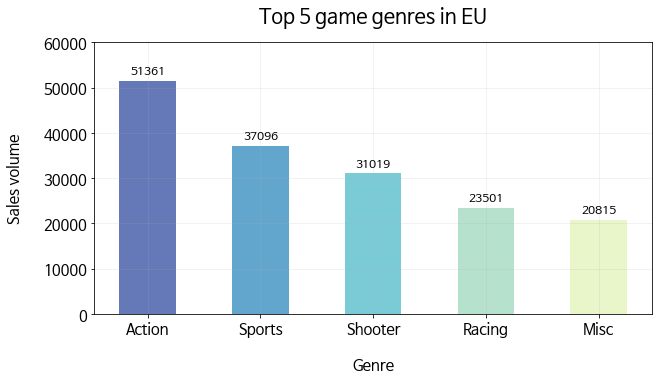

In [24]:
VisualizeData(EU_labels,EU_values,'EU')

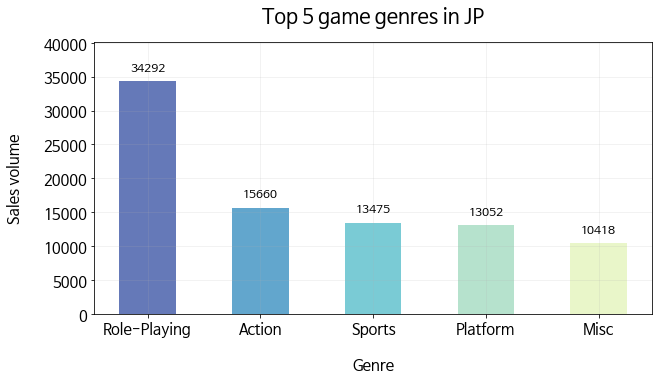

In [25]:
VisualizeData(JP_labels,JP_values,'JP')

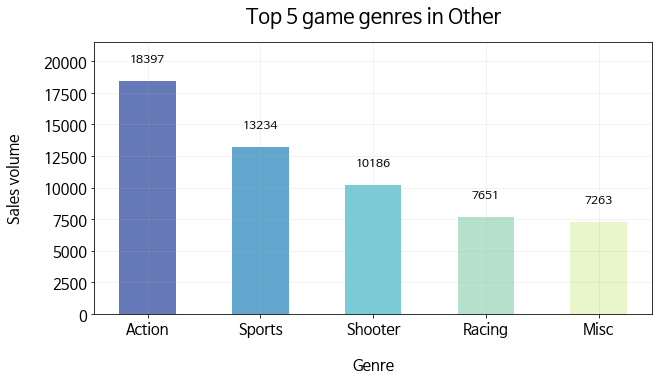

In [26]:
VisualizeData(Other_labels,Other_values,'Other')

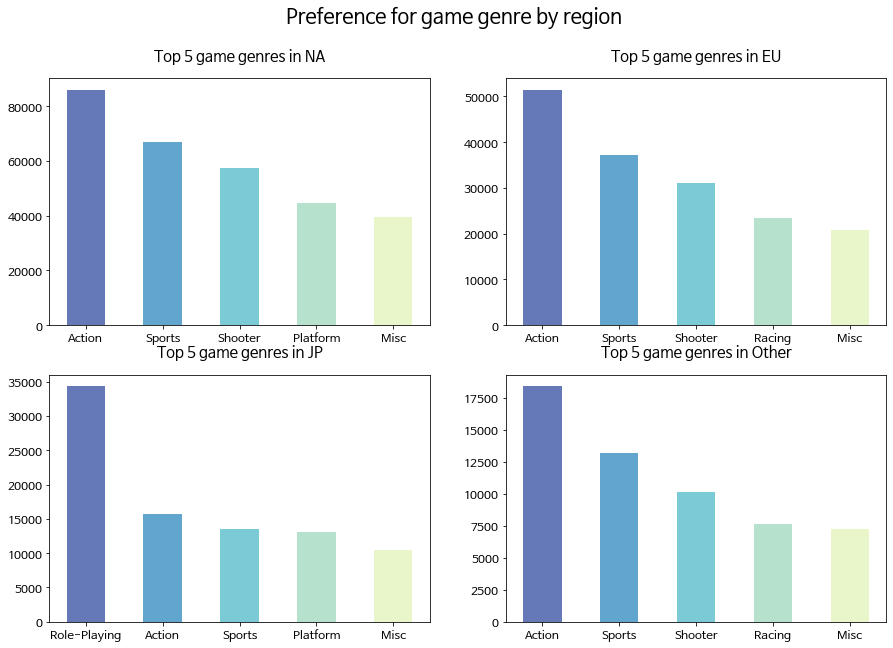

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle("Preference for game genre by region", fontsize=20)

def VisualizeMultipleData(x,y,labels,values,region):
    axs[x,y].bar(labels,values, width=0.5, color=colors1, alpha=0.7)
    axs[x,y].set_title('Top 5 game genres in '+region, fontsize=15, position=(0.5, 1.0+0.05))
    axs[x,y].tick_params(axis='x', labelsize=12)
    axs[x,y].tick_params(axis='y', labelsize=12)
    
VisualizeMultipleData(0,0,NA_labels,NA_values,'NA')
VisualizeMultipleData(0,1,EU_labels,EU_values,'EU')
VisualizeMultipleData(1,0,JP_labels,JP_values,'JP')
VisualizeMultipleData(1,1,Other_labels,Other_values,'Other')

**지역에 따라서 선호하는 게임 장르가 다름을 알 수 있다.**


# 연도별 게임의 트렌드가 있을까?

연도별 최다 판매 게임장르 조회

In [28]:
# 연도별로 최다판매 게임장르 및 판매량 딕셔너리 생성
mydict = {}
for year in df.Year.sort_values().unique():
    Genre = df.groupby('Year').get_group(year).groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False).index[0]
    Total_Sales = df.groupby('Year').get_group(year).groupby('Genre')['Total_Sales'].sum().sort_values(ascending=False)[0]
    mydict[year] = [Genre , Total_Sales]

In [29]:
# mydict

In [30]:
# 연도별 최다판매 게임장르의 판매량 리스트, 장르 리스트 생성
sales = []
genres = []
for i in mydict.values():
  genres.append(i[0])
  sales.append(i[1])

In [31]:
print(list(mydict.keys())[::5])
print(genres[::5])
print(sales[::5])

[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
['Shooter', 'Platform', 'Platform', 'Platform', 'Sports', 'Action', 'Action', 'Action']
[707, 4317, 2298, 1669, 4124, 8552, 11750, 6825]


연도별 최다판매 게임장르 시각화

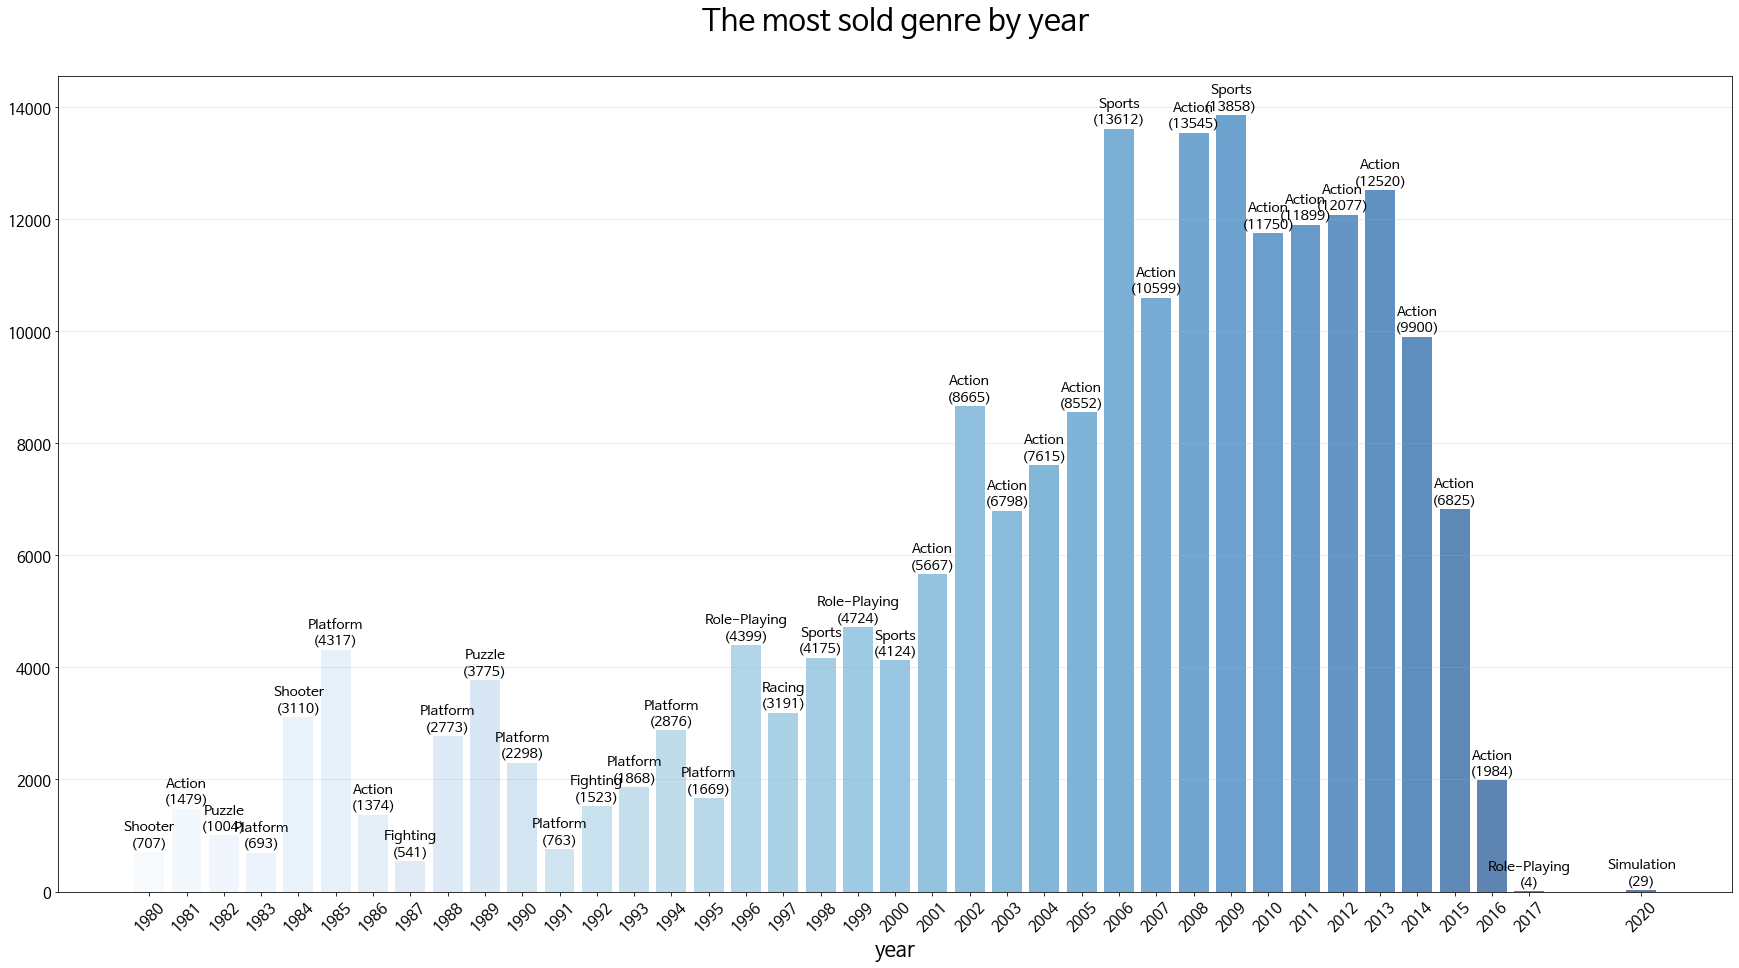

In [32]:
colors2 = sns.color_palette('Blues',len(mydict.keys()))

plt.figure(figsize=(30,15))
plt.bar(df.Year.sort_values().unique(),sales, color=colors2, alpha=0.65)
plt.title('The most sold genre by year', fontsize=30, position=(0.5,1.0+0.05))
plt.xlabel('year', fontsize=20)
# plt.ylabel('출고량\t(단위: 만)')
plt.yticks(fontsize=15)
plt.xticks(df.Year.sort_values().unique(), rotation=45, fontsize=15)
plt.grid(alpha=0.3, axis='y')
for idx, value in enumerate(sales):
    plt.text(df.Year.sort_values().unique()[idx], value+100, genres[idx]+f'\n({sales[idx]})',rotation=0, ha='center', color='black', fontsize=14)
plt.show()

In [33]:
# colors2 = ['r', 'g', 'g', 'g', 'b', 'y', 'y', 'y']


# plt.figure(figsize=(7,10))
# plt.bar(df.Year.sort_values().unique()[::5],sales[::5], width=3, color=colors2, alpha=0.55)
# plt.title('The most sold genre by year', fontsize=20)
# plt.xticks(df.Year.sort_values().unique()[::5], rotation=45)
# plt.grid(alpha=0.3, axis='y')
# for idx, value in enumerate(sales[::5]):
#     plt.text(df.Year.sort_values().unique()[::5][idx], value+100, genres[::5][idx]+f'\n({sales[::5][idx]})',rotation=0, ha='center', color='black', fontsize=11)
# plt.show()

### **연도별 게임 트렌드가 있음을 알 수 있다.**

# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [34]:
# 1980~2020년 출고량 상위 10개 게임들 조회

df[df.columns[1:]].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,4149,2902,377,846,8274
1,Super Mario Bros.,NES,1985,Platform,Nintendo,2908,358,681,77,4024
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,1585,1288,379,331,3583
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575,1101,328,296,3300
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127,889,1022,100,3138
5,Tetris,GB,1989,Puzzle,Nintendo,2320,226,422,58,3026
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138,923,650,290,3001
7,Wii Play,Wii,2006,Misc,Nintendo,1403,920,293,285,2901
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1459,706,470,226,2861
9,Duck Hunt,NES,1984,Shooter,Nintendo,2693,63,28,47,2831


출고량 상위 10개가 모두 Nintendo 에서 제작된 게임이였으며 지원되는 플랫폼 또한 닌텐도에서 만든 가정용 게임기기들과 휴대용 게임기기였다. 게임 장르 또한 스포츠, 플랫폼 등으로 다양하였다.
게임제작사 닌텐도는 오락기기의 제조 및 판매를 하는 1889년에 설립된 일본 회사이다.


데이터 범위를 1980년부터 10년주기로 출고량 상위5개의 게임을 살펴보면 다음과 같다.

In [35]:
def 출고량상위5개의게임시각화(시작연도,끝연도):
    범위 = df[(시작연도 <= df.Year) & (df.Year <= 끝연도)].sort_values(by='Total_Sales',ascending=False).head()
    X=[1,3,5,7,9]
    plt.figure(figsize=(15,5))
    plt.barh(X, 범위.Total_Sales, color=colors1, height=1.5,alpha=0.7)
    ticklabel = 범위.Name+'\n('+범위.Publisher+')'
    plt.title(f'{시작연도}년~{끝연도}년 출고량 상위5개의 게임', fontsize=20, position=(0.5,1.0+0.05))
    plt.xlabel('출고량\t(단위: 만)',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(X,ticklabel, fontsize=14)
    for idx, gerne in enumerate(범위.Genre):
      plt.text(10, X[idx], 'Genre : '+gerne+'\t/\tPlatform : '+list(범위.Platform)[idx], fontsize=13)
    plt.show()

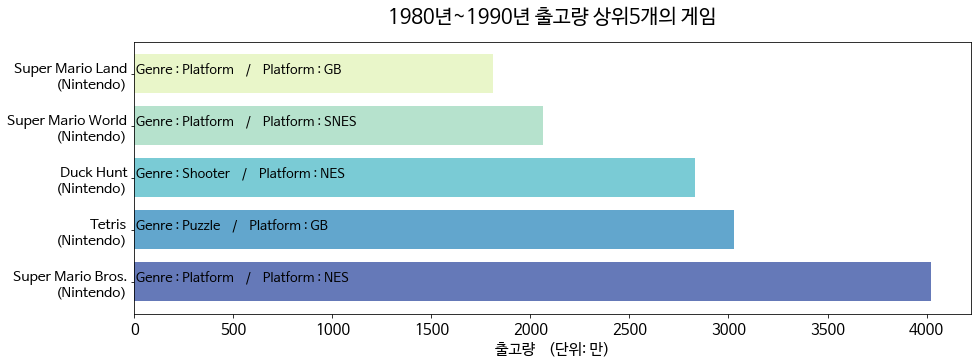

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,4200,Super Mario Bros.,NES,1985,Platform,Nintendo,2908,358,681,77,4024
1,1204,Tetris,GB,1989,Puzzle,Nintendo,2320,226,422,58,3026
2,10489,Duck Hunt,NES,1984,Shooter,Nintendo,2693,63,28,47,2831
3,13112,Super Mario World,SNES,1990,Platform,Nintendo,1278,375,354,55,2062
4,9492,Super Mario Land,GB,1989,Platform,Nintendo,1083,271,417,42,1813


In [36]:
# 1980~1990
출고량상위5개의게임시각화(1980,1990)
df[(1980 <= df.Year) & (df.Year <= 1990)].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head()

1980~1990년에는 Nintendo와 Platform 장르가 상위권에 위치한다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 233 missing from current font.
  font.set_text(s, 0, flags=flags)


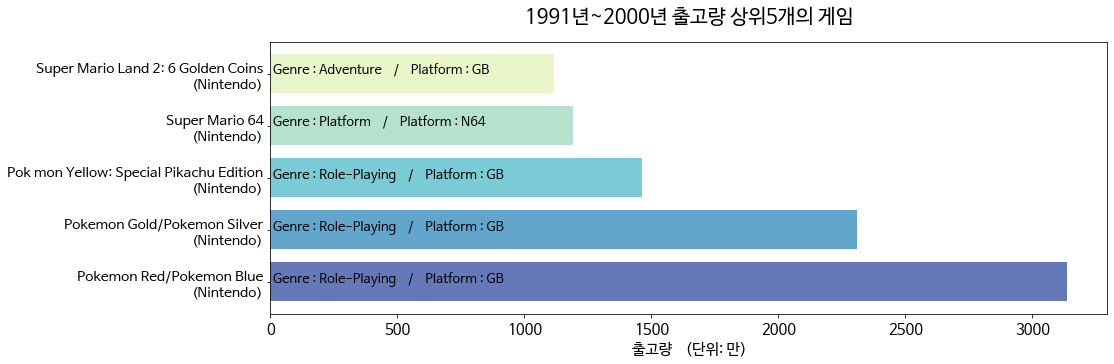

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1127,889,1022,100,3138
1,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,900,618,720,71,2309
2,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,589,504,312,59,1464
3,Super Mario 64,N64,1996,Platform,Nintendo,691,285,191,23,1190
4,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,616,204,269,29,1118


In [37]:
# 1991~2000
출고량상위5개의게임시각화(1991,2000)
df[df.columns[1:]][(1991 <= df.Year) & (df.Year <= 2000)].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head()

1991~2000년에는 Platform은 Nintendo의 휴대용 게임기인 GB(Game Boy), 장르는 Role-Playing	, Publisher는 Nintendo 가 상위권에 위치하며 포켓몬 게임과 슈퍼마리오게임이 최다판매되었다.

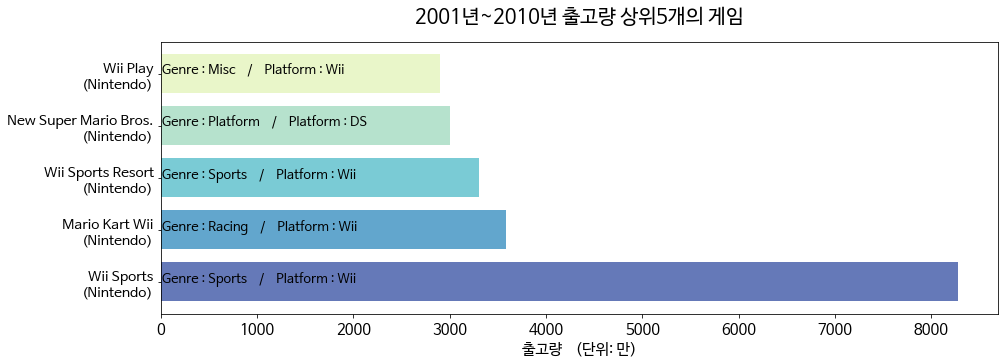

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,4149,2902,377,846,8274
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,1585,1288,379,331,3583
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,1575,1101,328,296,3300
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,1138,923,650,290,3001
4,Wii Play,Wii,2006,Misc,Nintendo,1403,920,293,285,2901


In [38]:
# 2001~2010
출고량상위5개의게임시각화(2001,2010)
df[df.columns[1:]][(2001 <= df.Year) & (df.Year <= 2010)].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head()

2001~2010년에는 Nintendo사의 Wii가 2006년에 발매되면서 큰 인기를 끌었다.

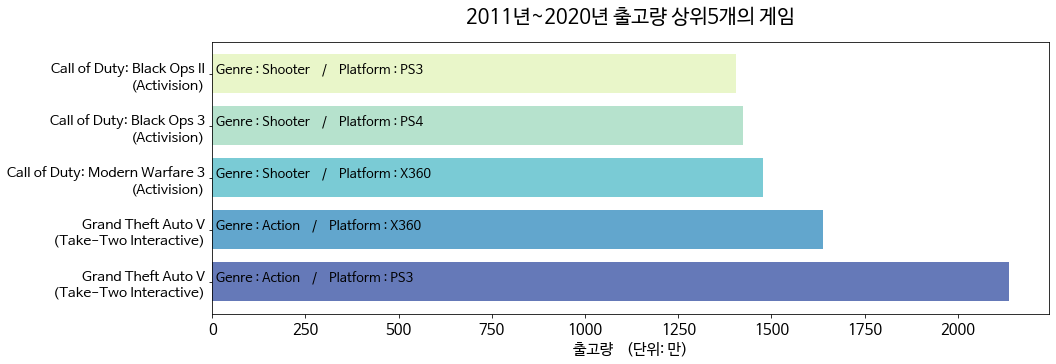

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,701,927,97,413,2138
1,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,963,531,6,138,1638
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,903,428,13,132,1476
3,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,577,581,35,231,1424
4,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,499,588,65,252,1404


In [39]:
# 2011~2020
출고량상위5개의게임시각화(2011,2020)
df[df.columns[1:]][(2011 <= df.Year) & (df.Year <= 2020)].sort_values(by='Total_Sales',ascending=False).reset_index(drop=True).head()

- 2011~2020년에는 다른 개발사들이 늘 상위권에 위치했던 Nintendo를 밀어내고 Platform 또한 PS와 
Xbox 가 선점하였으며 GTA 시리즈와 Call of Duty 시리즈가 인기가 많았다는 걸 알 수 있다.
- 새로운 플랫폼들이 등장하면서 게임 트렌드 또한 변화되었음을 알 수 있다. 혹은 반대로 그 플랫폼에서만 지원되는 큰 주목을 받았던 게임이 출시되면서 트렌드 또한 변화되었다고 볼 수 있다. 
-(게임간의 그래픽 차이가 있기 때문에 과거와는 다른 높은 그래픽 게임을 지원할 수 있는 플랫폼이 곧 트렌드로 변화함)

# 연도별 최다판매 게임의 플랫폼 분석

In [40]:
mydict2 = {}
for year in df.Year.sort_values().unique():
    Platform = df.groupby('Year').get_group(year).groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False).index[0]
    Total_Sales = df.groupby('Year').get_group(year).groupby('Platform')['Total_Sales'].sum().sort_values(ascending=False)[0]
    mydict2[year] = [Platform , Total_Sales]
platform = []
sales2 = []
for i in mydict2.values():
  platform.append(i[0])
  sales2.append(i[1])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


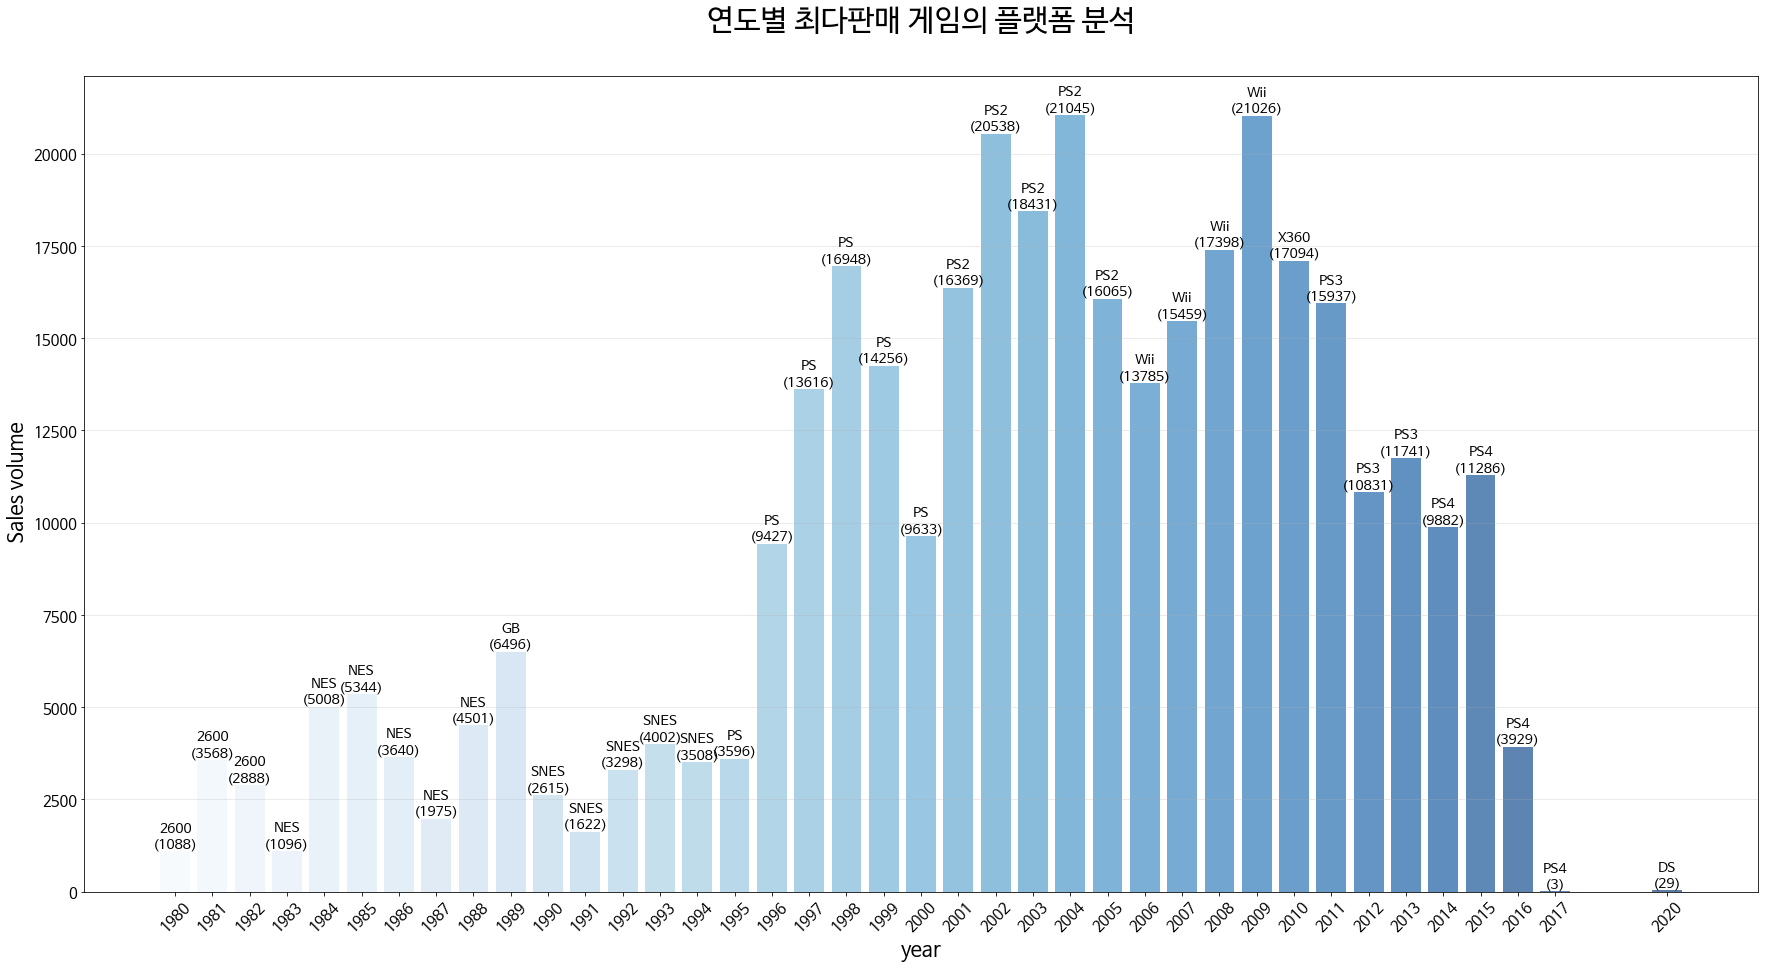

In [41]:
colors2 = sns.color_palette('Blues',len(mydict2.keys()))

plt.figure(figsize=(30,15))
plt.bar(df.Year.sort_values().unique(),sales2, color=colors2, alpha=0.65)
plt.title('연도별 최다판매 게임의 플랫폼 분석', fontsize=30, position=(0.5,1.0+0.05))
plt.xlabel('year', fontsize=20)
plt.ylabel('Sales volume', rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(df.Year.sort_values().unique(), rotation=45, fontsize=15)
plt.grid(alpha=0.3, axis='y')
for idx, value in enumerate(sales2):
    plt.text(df.Year.sort_values().unique()[idx], value+100, platform[idx]+f'\n({sales2[idx]})',rotation=0, ha='center', color='black', fontsize=14)
plt.show()

- 전체기간을 보았을 때 연도별 최다판매한 게임의 플랫폼이 Nintendo사의 자체 플랫폼(NES, GB, SNES,Wii)에서 점점 PS(PS, PS2, PS3, PS4)으로 변화하는 것을 알 수 있다. (Xbox는 2인자 느낌)

# 결론



- PS 와 Xbox에서 멀티로 지원되는 Action 장르이면서 GTA와 같이 높은 자유도와 마치 현실과 같은 높은 그래픽의 고사양 게임을 설계
- Metaverse에 대한 대중들의 관심이 높아지기때문에 이와 같은 게임은 대중들의 요구와도 부합